# Идентификация частотного скана сигнала релаксации, состоящего из пяти экспоненциальных составляющих, моноэкспоненциальной моделью

In [1]:
from joblib import Parallel, delayed

import matplotlib.pyplot as plt

import numpy as np
from os import listdir
import pandas as pd
import tensorflow as tf

%matplotlib inline

from fsmodels import FrequencyScan, MultiExpFrequencyScan

In [2]:
n_exps = 5

n_scans = 31

central_time_constant_power = -2.0

frequency_powers = np.linspace(0, 3.5, 100)

dev = 1 + np.linspace(-0.25, 0.25, n_exps) * np.linspace(0, 1, n_scans).reshape(-1,1)

time_constant_powers = central_time_constant_power * dev

amplitudes = np.ones_like(time_constant_powers)

In [3]:
initial_model = FrequencyScan(fit_p_coef = True,
                              learning_rate = 0.2,
                              n_iters = 1000,
                              stop_val = 10**-10,
                              verbose = True,
                              tf_in_out = False)

In [4]:
def spectr_identification(time_constant_powers, 
                          amplitudes,
                          frequency_powers
                         ):
    
    exps_params = np.append(time_constant_powers.reshape(-1,1), amplitudes.reshape(-1,1), axis=1)

    model = MultiExpFrequencyScan(n_exps=time_constant_powers.shape[0],
                                   exps_params=exps_params)

    dlts = model(frequency_powers)
        
    model = FrequencyScan(time_constant_power=-1.25,
                          fit_p_coef = True,
                          learning_rate = 0.2,
                          n_iters = 1000,
                          stop_val = 10**-10,
                          verbose = True,
                          tf_in_out = False)
    
    fit_results = model.fit(frequency_powers, dlts)
    
    return fit_results.iloc[[-1], :]

In [5]:
n_jobs = -1

results = Parallel(n_jobs=n_jobs
                  )(delayed(spectr_identification
                           )(time_constant_power,amplitude,frequency_powers
                            ) for time_constant_power, amplitude in zip(time_constant_powers, amplitudes))

results = pd.concat(results, ignore_index=True)
results[['tc_0', 'tc_1', 'tc_2', 'tc_3', 'tc_4']] = 10 ** time_constant_powers
results[['amp_0', 'amp_1', 'amp_2', 'amp_3', 'amp_4']] = amplitudes

results.to_csv('../models/3-exp-clear/models_parameters.csv', index=False)

results

,amplitude,time_constant_power,p_coef,loss,tc_0,tc_1,tc_2,tc_3,tc_4,amp_0,amp_1,amp_2,amp_3,amp_4
0,3.614659,-1.424711,0.488738,2.236801,0.010000,0.010000,0.01,0.010000,0.010000,1.0,1.0,1.0,1.0,1.0
1,3.561937,-1.704848,0.373172,1.213727,0.010391,0.010194,0.01,0.009810,0.009624,1.0,1.0,1.0,1.0,1.0
2,3.630144,-1.435761,0.536785,2.201925,0.010798,0.010391,0.01,0.009624,0.009261,1.0,1.0,1.0,1.0,1.0
3,3.60082,-1.467253,0.62302,2.089124,0.011220,0.010593,0.01,0.009441,0.008913,1.0,1.0,1.0,1.0,1.0
4,3.663409,-2.678661,0.780888,3.278725,0.011659,0.010798,0.01,0.009261,0.008577,1.0,1.0,1.0,1.0,1.0
5,3.588172,-2.674822,0.60433,2.978725,0.012115,0.011007,0.01,0.009085,0.008254,1.0,1.0,1.0,1.0,1.0
6,3.547197,-1.991091,1.764192,1.132032,0.012589,0.011220,0.01,0.008913,0.007943,1.0,1.0,1.0,1.0,1.0
7,3.636411,-1.57057,0.901956,1.739055,0.013082,0.011438,0.01,0.008743,0.007644,1.0,1.0,1.0,1.0,1.0
8,3.555047,-1.537433,0.327986,1.804569,0.013594,0.011659,0.01,0.008577,0.007356,1.0,1.0,1.0,1.0,1.0
9,3.520429,-2.330015,0.673048,1.075361,0.014125,0.011885,0.01,0.008414,0.007079,1.0,1.0,1.0,1.0,1.0


In [6]:
def plot_model(data, initial_dlts, model, freq_ix=0, dlts_ix=1, alpha_ex=0.3):
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))

    ax.plot(data[:,freq_ix], data[:,dlts_ix], 'og', label='Экспериментальные\nданные', alpha=alpha_ex)
    ax.plot(data[:,freq_ix], initial_dlts, '--b', label='Начальная\nмодель', alpha=1)
    ax.plot(data[:,freq_ix], model(data[:,freq_ix]), '-r', label='Идентифицированная\nмодель', alpha=1)
    ax.grid()
    ax.set_xlim([0, 3.5])
    ax.legend()
    ax.set_ylabel('DLTS, условные еденицы')
    ax.set_xlabel('log10(Частота), log10(Гц)')
    plt.title('Результат идентификации модели')
    return fig, ax

In [7]:
def plot_spectr(time_constant_powers, amplitudes):
    fig, ax = plt.subplots(1,1)
    
    for TC, AMP in zip(time_constant_powers, amplitudes):
        ax.semilogx([10 ** TC, 10 ** TC], [0, AMP], '-b')
        
    ax.set_title('Спектр')
    ax.set_xlabel('Постоянная времени, с')
    ax.set_ylabel('Амплитуда')
    ax.grid()
    ax.set_xlim([1, 1/2500])
    ax.set_ylim([0, 1.4])
    
    return fig, ax


def plot_group_of_models(frequency_powers,
                         time_constant_powers,
                         amplitudes,
                         initial_dlts, 
                         fit_results,
                         save_to=None
                        ):
    
    for time_constant_power, amplitude, i in zip(time_constant_powers, amplitudes, fit_results.index):
        print(f'Спектр № {i}')
        print(fit_results.loc[i,:])
        print(f'Значения степеней постоянных времени{time_constant_power}')
        print(f'Значения амплитуды {amplitude}')
        
        
        plot_spectr(time_constant_power, amplitude)
        
        if save_to is not None:
            plt.savefig(save_to + 'spectr' + f'{i}' + '.pdf', bbox_inches='tight')
            plt.savefig(save_to + 'spectr' + f'{i}' + '.jpg', bbox_inches='tight')

        plt.show()
        
        
        exps_params = np.append(time_constant_power.reshape(-1,1), amplitude.reshape(-1,1), axis=1)
        model = MultiExpFrequencyScan(n_exps=time_constant_power.shape[0],
                                       exps_params=exps_params)
        dlts = model(frequency_powers)
        
            
        model = FrequencyScan()
        model.time_constant_power = fit_results.loc[i, 'time_constant_power']
        model.amplitude = fit_results.loc[i, 'amplitude']
        model.p_coef = fit_results.loc[i, 'p_coef']
        
        fig, ax = plot_model(np.c_[frequency_powers, dlts], initial_dlts, model, alpha_ex=0.6)
        
        if save_to is not None:
            plt.savefig(save_to + 'identification_results_' + f'{i}' + '.pdf', bbox_inches='tight')
            plt.savefig(save_to + 'identification_results_' + f'{i}' + '.jpg', bbox_inches='tight')        
        
        plt.show()

Спектр № 0
amplitude              3.614659
time_constant_power   -1.424711
p_coef                 0.488738
loss                   2.236801
tc_0                       0.01
tc_1                       0.01
tc_2                       0.01
tc_3                       0.01
tc_4                       0.01
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 0, dtype: object
Значения степеней постоянных времени[-2. -2. -2. -2. -2.]
Значения амплитуды [1. 1. 1. 1. 1.]


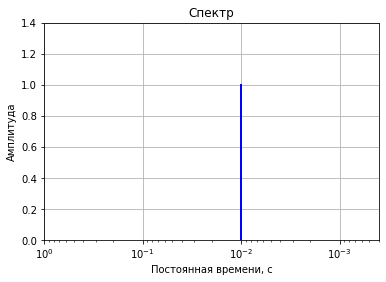

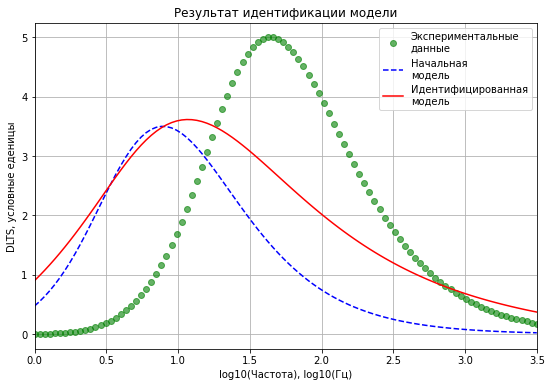

Спектр № 1
amplitude              3.561937
time_constant_power   -1.704848
p_coef                 0.373172
loss                   1.213727
tc_0                   0.010391
tc_1                   0.010194
tc_2                       0.01
tc_3                    0.00981
tc_4                   0.009624
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 1, dtype: object
Значения степеней постоянных времени[-1.98333333 -1.99166667 -2.         -2.00833333 -2.01666667]
Значения амплитуды [1. 1. 1. 1. 1.]


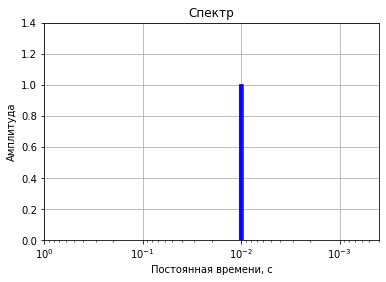

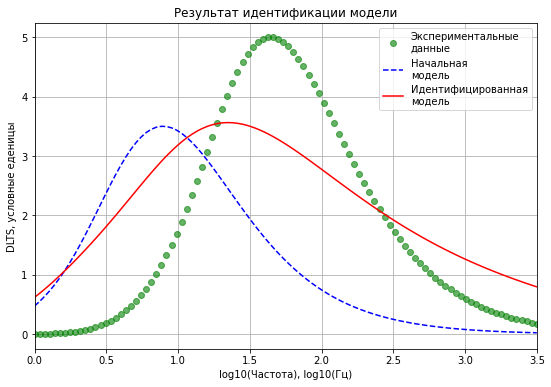

Спектр № 2
amplitude              3.630144
time_constant_power   -1.435761
p_coef                 0.536785
loss                   2.201925
tc_0                   0.010798
tc_1                   0.010391
tc_2                       0.01
tc_3                   0.009624
tc_4                   0.009261
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 2, dtype: object
Значения степеней постоянных времени[-1.96666667 -1.98333333 -2.         -2.01666667 -2.03333333]
Значения амплитуды [1. 1. 1. 1. 1.]


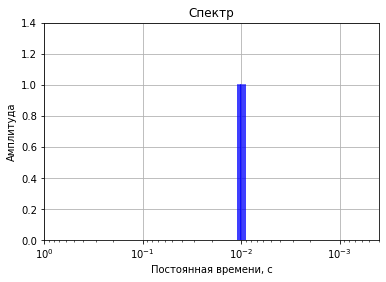

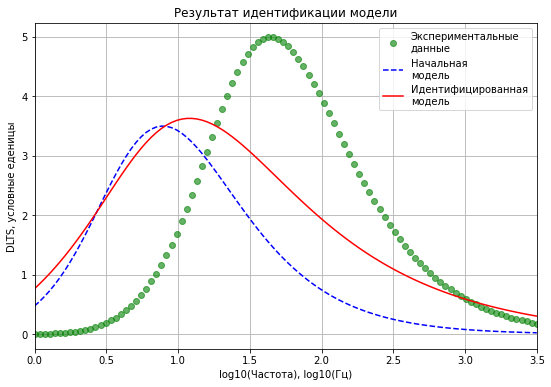

Спектр № 3
amplitude               3.60082
time_constant_power   -1.467253
p_coef                  0.62302
loss                   2.089124
tc_0                    0.01122
tc_1                   0.010593
tc_2                       0.01
tc_3                   0.009441
tc_4                   0.008913
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 3, dtype: object
Значения степеней постоянных времени[-1.95  -1.975 -2.    -2.025 -2.05 ]
Значения амплитуды [1. 1. 1. 1. 1.]


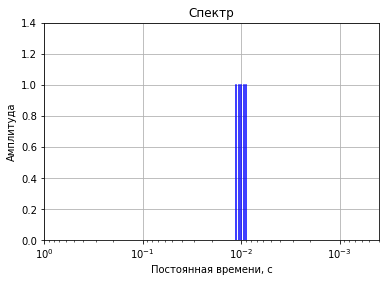

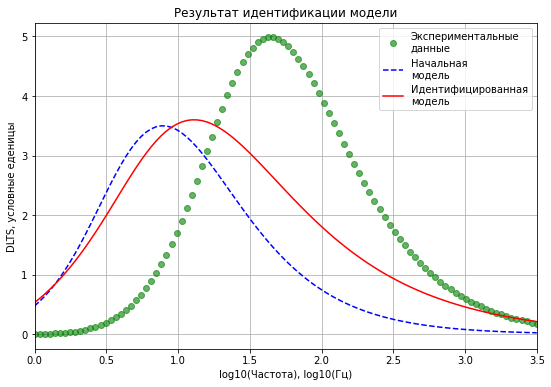

Спектр № 4
amplitude              3.663409
time_constant_power   -2.678661
p_coef                 0.780888
loss                   3.278725
tc_0                   0.011659
tc_1                   0.010798
tc_2                       0.01
tc_3                   0.009261
tc_4                   0.008577
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 4, dtype: object
Значения степеней постоянных времени[-1.93333333 -1.96666667 -2.         -2.03333333 -2.06666667]
Значения амплитуды [1. 1. 1. 1. 1.]


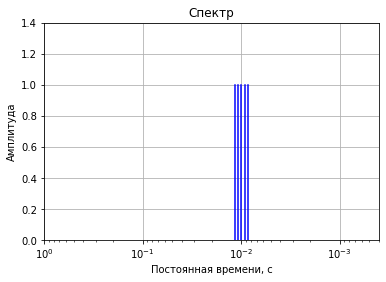

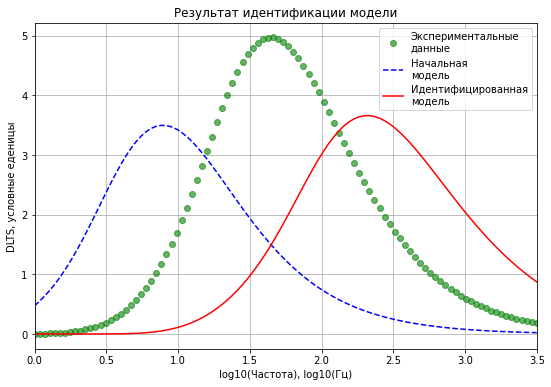

Спектр № 5
amplitude              3.588172
time_constant_power   -2.674822
p_coef                  0.60433
loss                   2.978725
tc_0                   0.012115
tc_1                   0.011007
tc_2                       0.01
tc_3                   0.009085
tc_4                   0.008254
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 5, dtype: object
Значения степеней постоянных времени[-1.91666667 -1.95833333 -2.         -2.04166667 -2.08333333]
Значения амплитуды [1. 1. 1. 1. 1.]


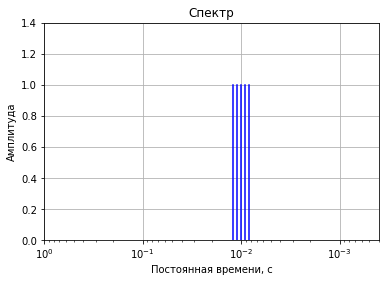

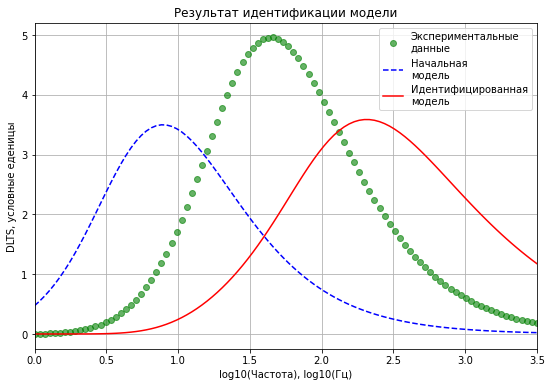

Спектр № 6
amplitude              3.547197
time_constant_power   -1.991091
p_coef                 1.764192
loss                   1.132032
tc_0                   0.012589
tc_1                    0.01122
tc_2                       0.01
tc_3                   0.008913
tc_4                   0.007943
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 6, dtype: object
Значения степеней постоянных времени[-1.9  -1.95 -2.   -2.05 -2.1 ]
Значения амплитуды [1. 1. 1. 1. 1.]


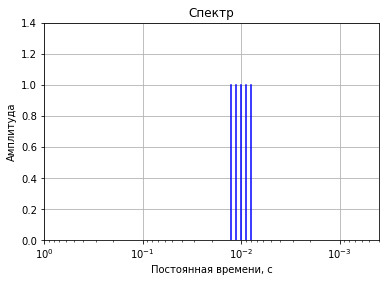

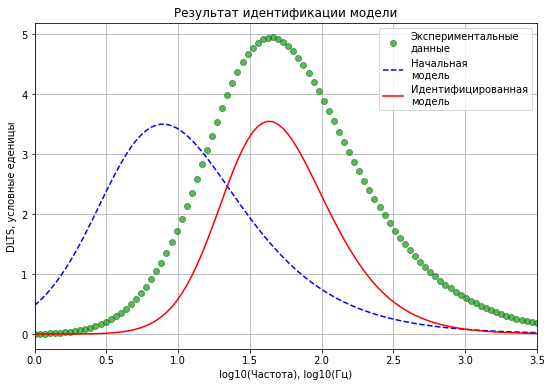

Спектр № 7
amplitude              3.636411
time_constant_power    -1.57057
p_coef                 0.901956
loss                   1.739055
tc_0                   0.013082
tc_1                   0.011438
tc_2                       0.01
tc_3                   0.008743
tc_4                   0.007644
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 7, dtype: object
Значения степеней постоянных времени[-1.88333333 -1.94166667 -2.         -2.05833333 -2.11666667]
Значения амплитуды [1. 1. 1. 1. 1.]


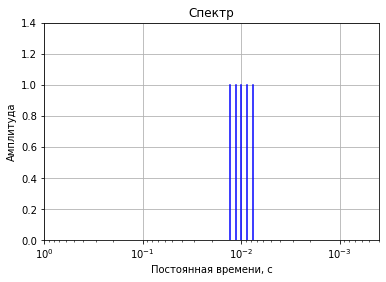

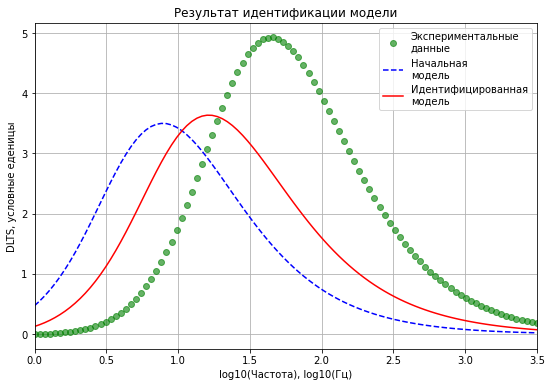

Спектр № 8
amplitude              3.555047
time_constant_power   -1.537433
p_coef                 0.327986
loss                   1.804569
tc_0                   0.013594
tc_1                   0.011659
tc_2                       0.01
tc_3                   0.008577
tc_4                   0.007356
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 8, dtype: object
Значения степеней постоянных времени[-1.86666667 -1.93333333 -2.         -2.06666667 -2.13333333]
Значения амплитуды [1. 1. 1. 1. 1.]


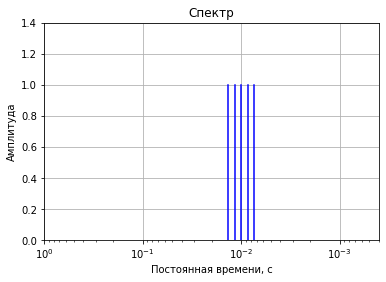

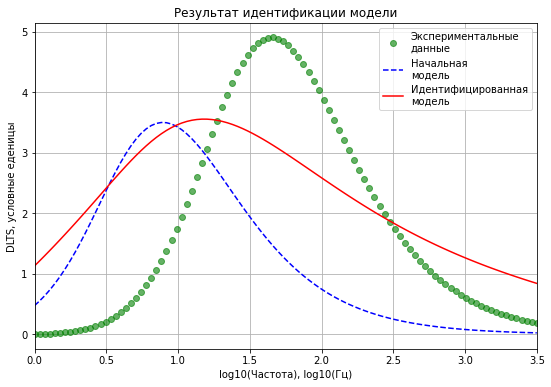

Спектр № 9
amplitude              3.520429
time_constant_power   -2.330015
p_coef                 0.673048
loss                   1.075361
tc_0                   0.014125
tc_1                   0.011885
tc_2                       0.01
tc_3                   0.008414
tc_4                   0.007079
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 9, dtype: object
Значения степеней постоянных времени[-1.85  -1.925 -2.    -2.075 -2.15 ]
Значения амплитуды [1. 1. 1. 1. 1.]


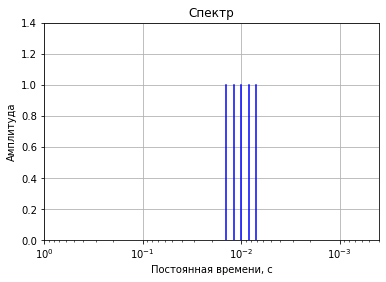

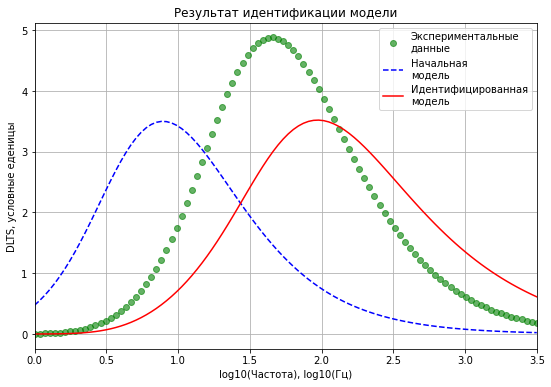

Спектр № 10
amplitude              3.529106
time_constant_power   -2.341603
p_coef                 0.579951
loss                   1.061756
tc_0                   0.014678
tc_1                   0.012115
tc_2                       0.01
tc_3                   0.008254
tc_4                   0.006813
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 10, dtype: object
Значения степеней постоянных времени[-1.83333333 -1.91666667 -2.         -2.08333333 -2.16666667]
Значения амплитуды [1. 1. 1. 1. 1.]


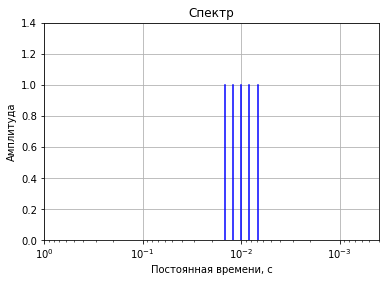

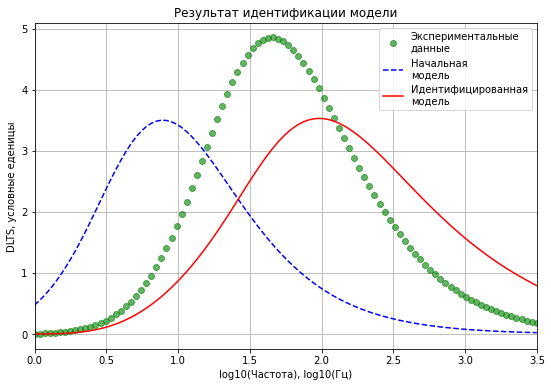

Спектр № 11
amplitude              3.551731
time_constant_power    -2.39536
p_coef                 0.532009
loss                   1.251226
tc_0                   0.015252
tc_1                    0.01235
tc_2                       0.01
tc_3                   0.008097
tc_4                   0.006556
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 11, dtype: object
Значения степеней постоянных времени[-1.81666667 -1.90833333 -2.         -2.09166667 -2.18333333]
Значения амплитуды [1. 1. 1. 1. 1.]


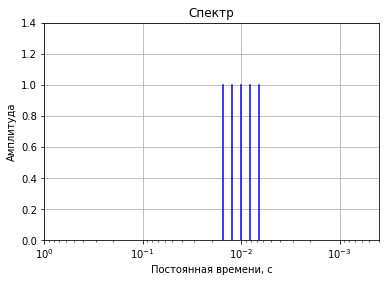

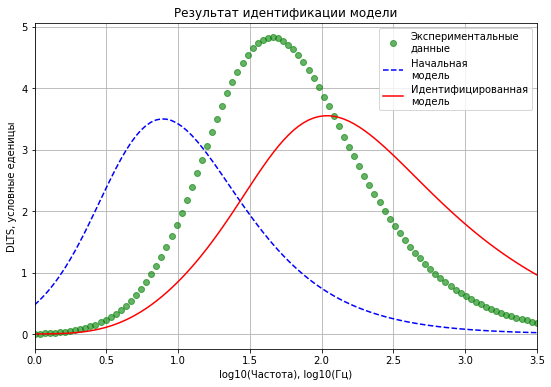

Спектр № 12
amplitude              3.557213
time_constant_power   -2.395202
p_coef                 0.532259
loss                   1.231231
tc_0                   0.015849
tc_1                   0.012589
tc_2                       0.01
tc_3                   0.007943
tc_4                    0.00631
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 12, dtype: object
Значения степеней постоянных времени[-1.8 -1.9 -2.  -2.1 -2.2]
Значения амплитуды [1. 1. 1. 1. 1.]


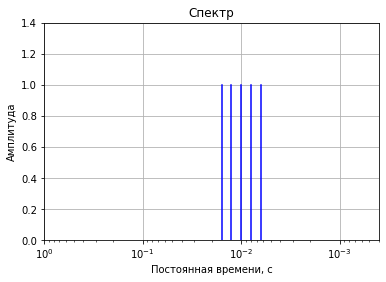

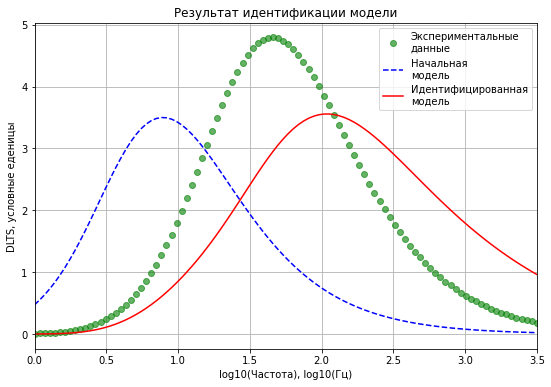

Спектр № 13
amplitude              3.562525
time_constant_power   -2.393029
p_coef                 0.534223
loss                   1.202115
tc_0                   0.016469
tc_1                   0.012833
tc_2                       0.01
tc_3                   0.007792
tc_4                   0.006072
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 13, dtype: object
Значения степеней постоянных времени[-1.78333333 -1.89166667 -2.         -2.10833333 -2.21666667]
Значения амплитуды [1. 1. 1. 1. 1.]


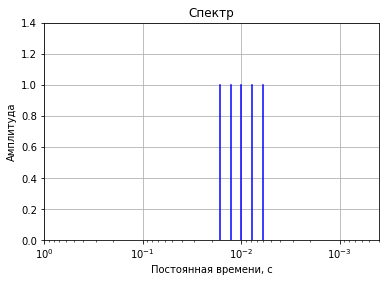

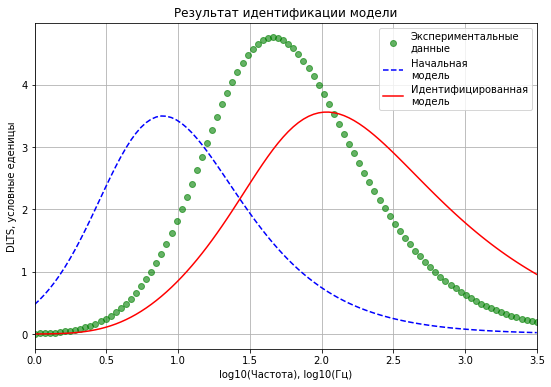

Спектр № 14
amplitude              3.568387
time_constant_power   -2.390558
p_coef                 0.536303
loss                   1.170949
tc_0                   0.017113
tc_1                   0.013082
tc_2                       0.01
tc_3                   0.007644
tc_4                   0.005843
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 14, dtype: object
Значения степеней постоянных времени[-1.76666667 -1.88333333 -2.         -2.11666667 -2.23333333]
Значения амплитуды [1. 1. 1. 1. 1.]


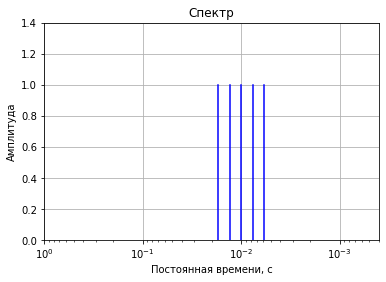

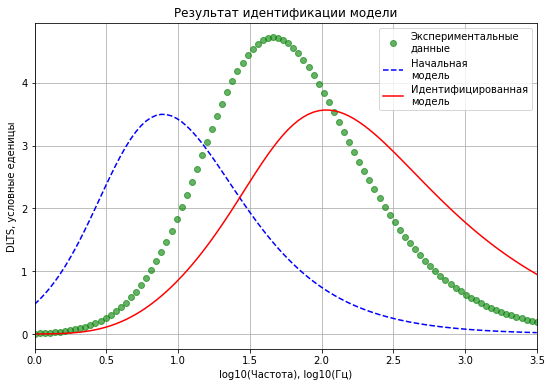

Спектр № 15
amplitude              3.574832
time_constant_power    -2.38775
p_coef                 0.538489
loss                    1.13775
tc_0                   0.017783
tc_1                   0.013335
tc_2                       0.01
tc_3                   0.007499
tc_4                   0.005623
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 15, dtype: object
Значения степеней постоянных времени[-1.75  -1.875 -2.    -2.125 -2.25 ]
Значения амплитуды [1. 1. 1. 1. 1.]


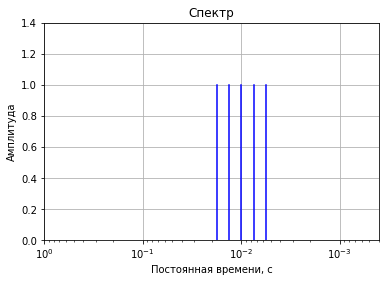

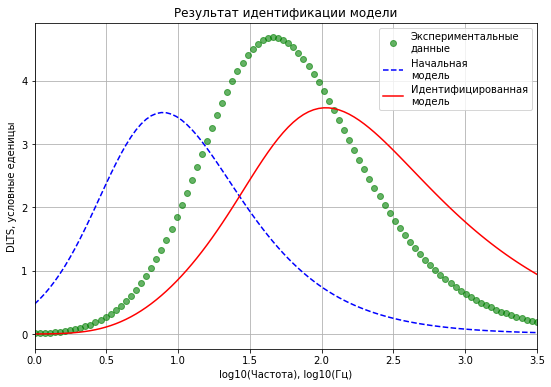

Спектр № 16
amplitude              3.581893
time_constant_power   -2.384558
p_coef                 0.540774
loss                    1.10252
tc_0                   0.018478
tc_1                   0.013594
tc_2                       0.01
tc_3                   0.007356
tc_4                   0.005412
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 16, dtype: object
Значения степеней постоянных времени[-1.73333333 -1.86666667 -2.         -2.13333333 -2.26666667]
Значения амплитуды [1. 1. 1. 1. 1.]


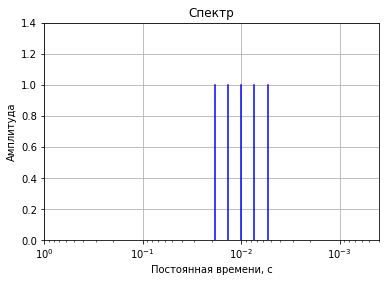

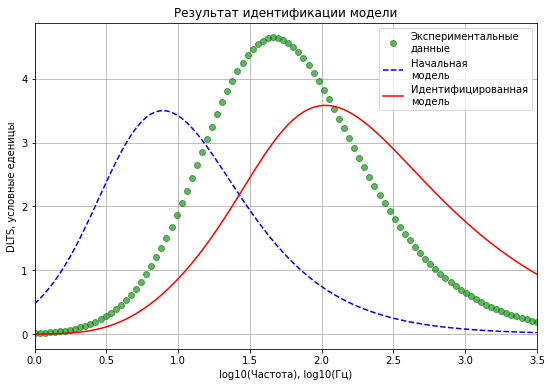

Спектр № 17
amplitude              3.589609
time_constant_power   -2.380929
p_coef                 0.543151
loss                   1.065247
tc_0                   0.019201
tc_1                   0.013857
tc_2                       0.01
tc_3                   0.007217
tc_4                   0.005208
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 17, dtype: object
Значения степеней постоянных времени[-1.71666667 -1.85833333 -2.         -2.14166667 -2.28333333]
Значения амплитуды [1. 1. 1. 1. 1.]


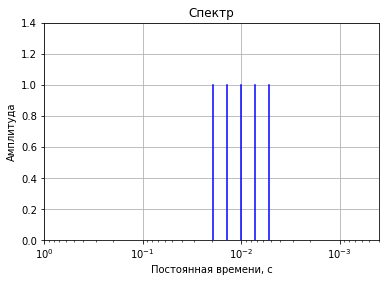

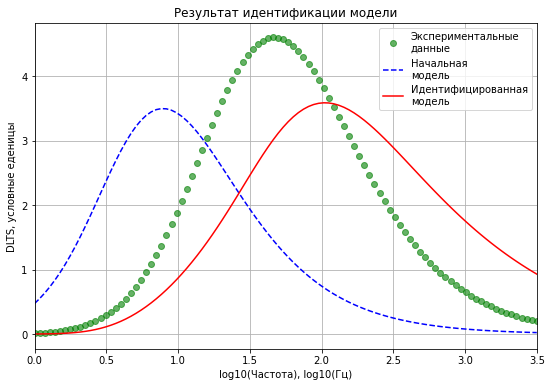

Спектр № 18
amplitude               3.59802
time_constant_power   -2.376798
p_coef                 0.545613
loss                   1.025898
tc_0                   0.019953
tc_1                   0.014125
tc_2                       0.01
tc_3                   0.007079
tc_4                   0.005012
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 18, dtype: object
Значения степеней постоянных времени[-1.7  -1.85 -2.   -2.15 -2.3 ]
Значения амплитуды [1. 1. 1. 1. 1.]


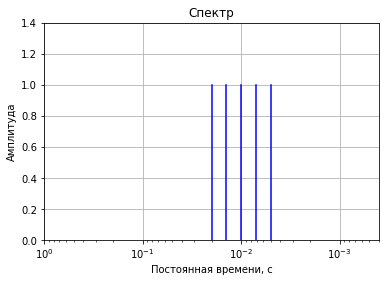

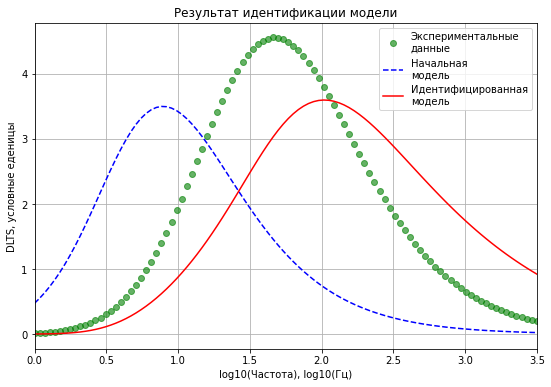

Спектр № 19
amplitude              3.607171
time_constant_power    -2.37209
p_coef                 0.548157
loss                   0.984424
tc_0                   0.020733
tc_1                   0.014399
tc_2                       0.01
tc_3                   0.006945
tc_4                   0.004823
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 19, dtype: object
Значения степеней постоянных времени[-1.68333333 -1.84166667 -2.         -2.15833333 -2.31666667]
Значения амплитуды [1. 1. 1. 1. 1.]


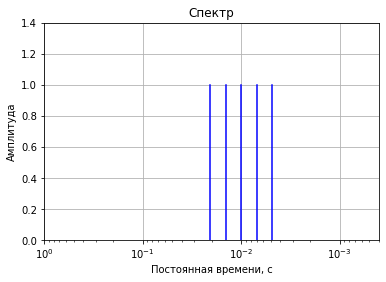

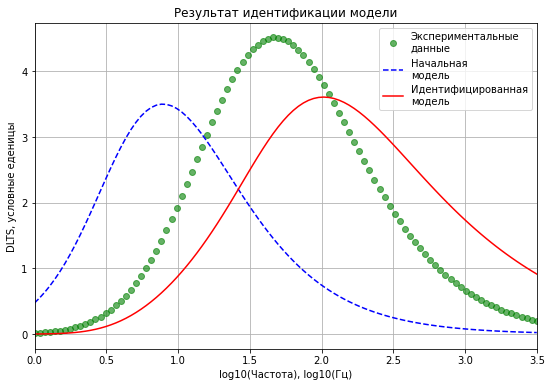

Спектр № 20
amplitude              3.617108
time_constant_power   -2.366716
p_coef                 0.550781
loss                   0.940755
tc_0                   0.021544
tc_1                   0.014678
tc_2                       0.01
tc_3                   0.006813
tc_4                   0.004642
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 20, dtype: object
Значения степеней постоянных времени[-1.66666667 -1.83333333 -2.         -2.16666667 -2.33333333]
Значения амплитуды [1. 1. 1. 1. 1.]


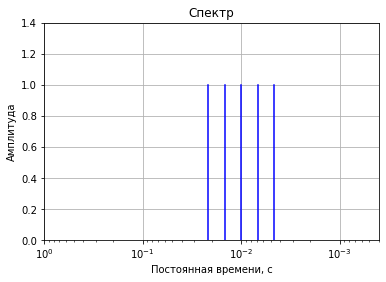

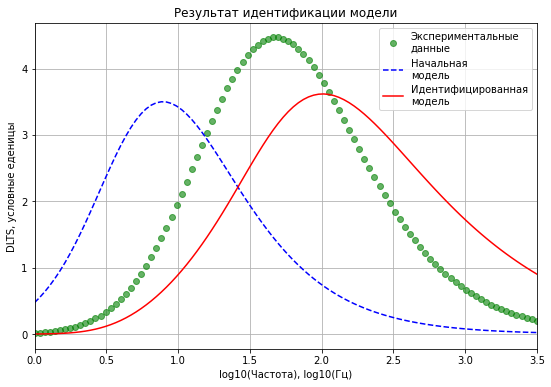

Спектр № 21
amplitude              3.627883
time_constant_power   -2.360572
p_coef                 0.553488
loss                   0.894803
tc_0                   0.022387
tc_1                   0.014962
tc_2                       0.01
tc_3                   0.006683
tc_4                   0.004467
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 21, dtype: object
Значения степеней постоянных времени[-1.65  -1.825 -2.    -2.175 -2.35 ]
Значения амплитуды [1. 1. 1. 1. 1.]


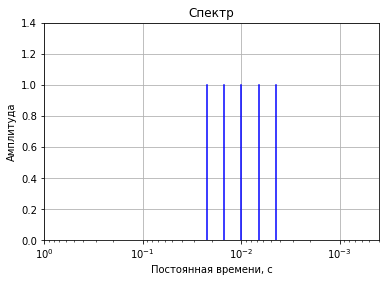

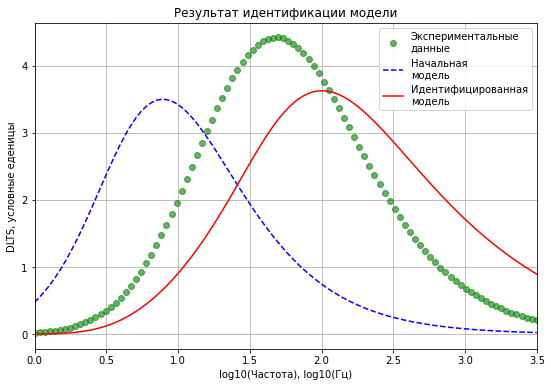

Спектр № 22
amplitude              3.639548
time_constant_power   -2.353535
p_coef                 0.556286
loss                   0.846461
tc_0                   0.023263
tc_1                   0.015252
tc_2                       0.01
tc_3                   0.006556
tc_4                   0.004299
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 22, dtype: object
Значения степеней постоянных времени[-1.63333333 -1.81666667 -2.         -2.18333333 -2.36666667]
Значения амплитуды [1. 1. 1. 1. 1.]


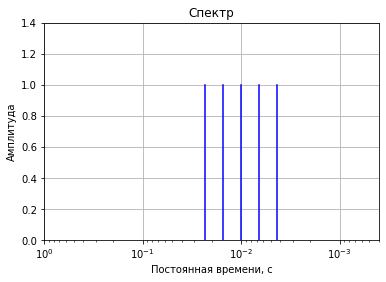

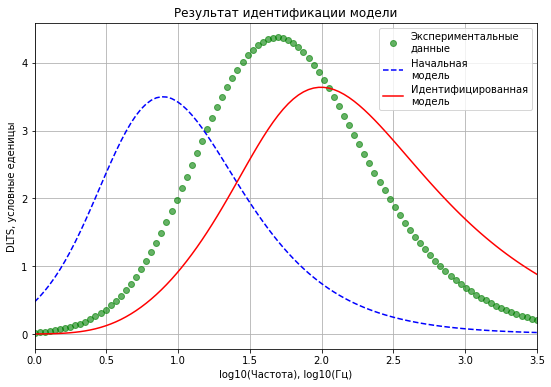

Спектр № 23
amplitude              3.652161
time_constant_power   -2.345461
p_coef                 0.559189
loss                   0.795604
tc_0                   0.024173
tc_1                   0.015548
tc_2                       0.01
tc_3                   0.006432
tc_4                   0.004137
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 23, dtype: object
Значения степеней постоянных времени[-1.61666667 -1.80833333 -2.         -2.19166667 -2.38333333]
Значения амплитуды [1. 1. 1. 1. 1.]


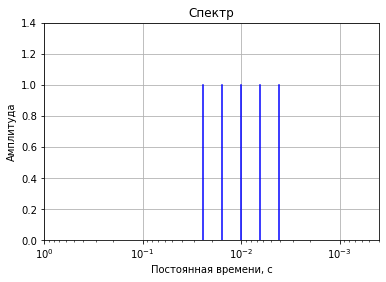

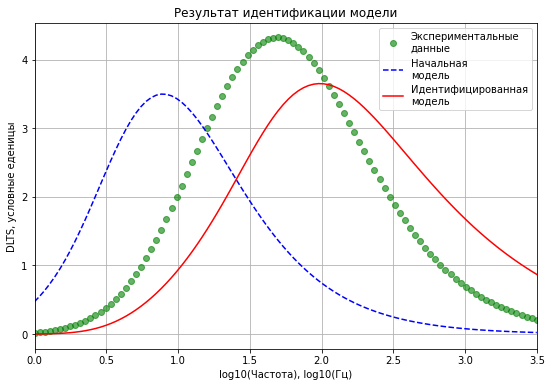

Спектр № 24
amplitude              3.665782
time_constant_power   -2.336176
p_coef                 0.562219
loss                   0.742095
tc_0                   0.025119
tc_1                   0.015849
tc_2                       0.01
tc_3                    0.00631
tc_4                   0.003981
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 24, dtype: object
Значения степеней постоянных времени[-1.6 -1.8 -2.  -2.2 -2.4]
Значения амплитуды [1. 1. 1. 1. 1.]


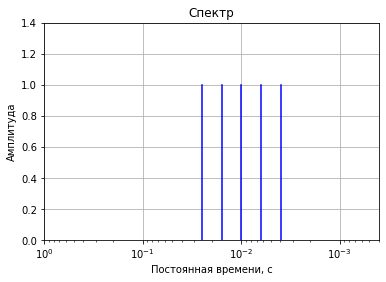

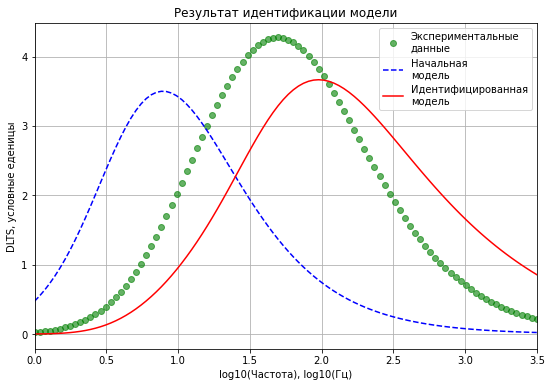

Спектр № 25
amplitude              3.680474
time_constant_power   -2.325468
p_coef                 0.565409
loss                    0.68578
tc_0                   0.026102
tc_1                   0.016156
tc_2                       0.01
tc_3                    0.00619
tc_4                   0.003831
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 25, dtype: object
Значения степеней постоянных времени[-1.58333333 -1.79166667 -2.         -2.20833333 -2.41666667]
Значения амплитуды [1. 1. 1. 1. 1.]


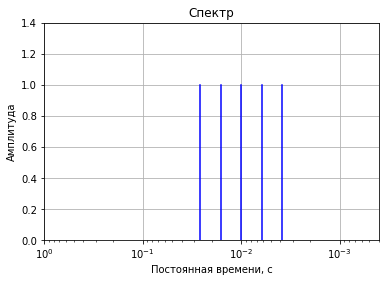

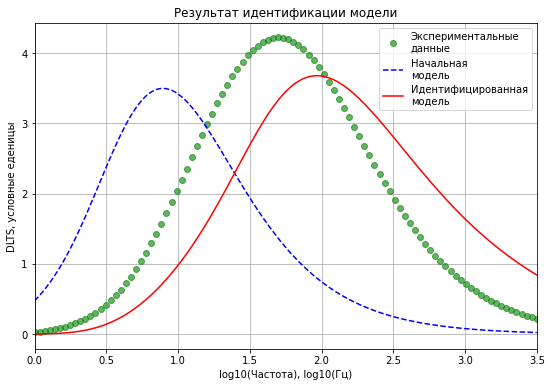

Спектр № 26
amplitude              3.696306
time_constant_power    -2.31308
p_coef                 0.568802
loss                   0.626497
tc_0                   0.027123
tc_1                   0.016469
tc_2                       0.01
tc_3                   0.006072
tc_4                   0.003687
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 26, dtype: object
Значения степеней постоянных времени[-1.56666667 -1.78333333 -2.         -2.21666667 -2.43333333]
Значения амплитуды [1. 1. 1. 1. 1.]


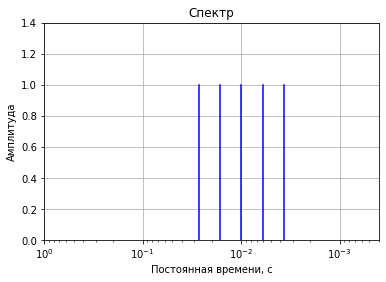

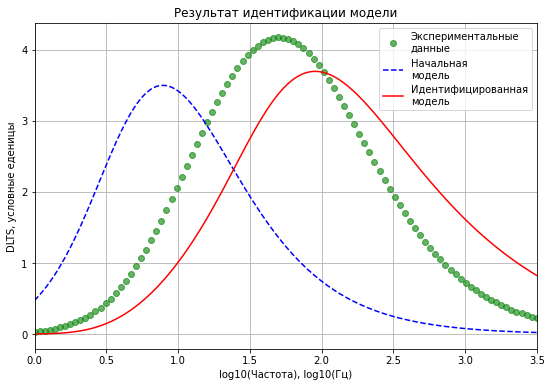

Спектр № 27
amplitude              3.713351
time_constant_power   -2.298681
p_coef                 0.572455
loss                   0.564073
tc_0                   0.028184
tc_1                   0.016788
tc_2                       0.01
tc_3                   0.005957
tc_4                   0.003548
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 27, dtype: object
Значения степеней постоянных времени[-1.55  -1.775 -2.    -2.225 -2.45 ]
Значения амплитуды [1. 1. 1. 1. 1.]


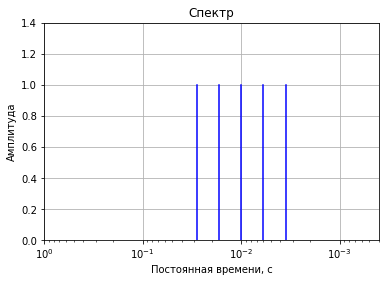

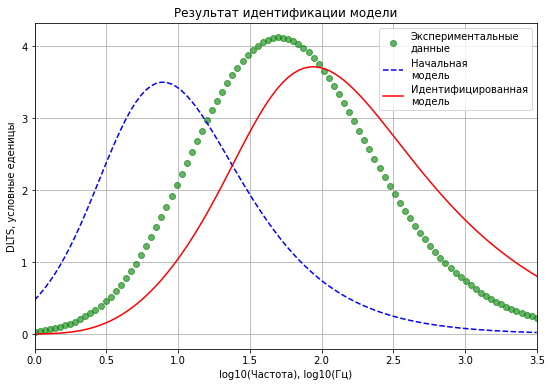

Спектр № 28
amplitude              3.731686
time_constant_power   -2.281836
p_coef                 0.576437
loss                   0.498324
tc_0                   0.029286
tc_1                   0.017113
tc_2                       0.01
tc_3                   0.005843
tc_4                   0.003415
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 28, dtype: object
Значения степеней постоянных времени[-1.53333333 -1.76666667 -2.         -2.23333333 -2.46666667]
Значения амплитуды [1. 1. 1. 1. 1.]


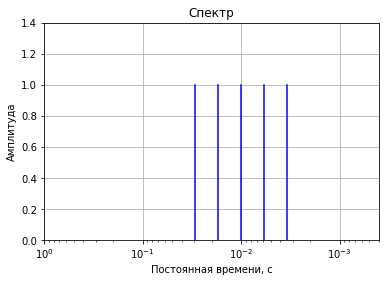

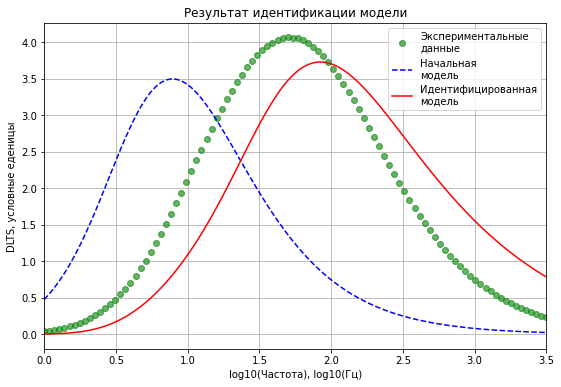

Спектр № 29
amplitude              3.751399
time_constant_power   -2.261943
p_coef                 0.580836
loss                   0.429058
tc_0                   0.030432
tc_1                   0.017445
tc_2                       0.01
tc_3                   0.005732
tc_4                   0.003286
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 29, dtype: object
Значения степеней постоянных времени[-1.51666667 -1.75833333 -2.         -2.24166667 -2.48333333]
Значения амплитуды [1. 1. 1. 1. 1.]


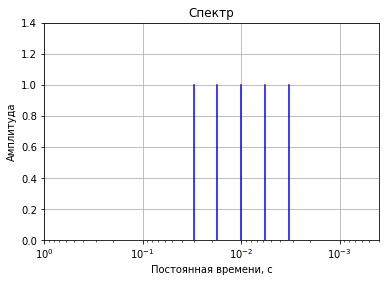

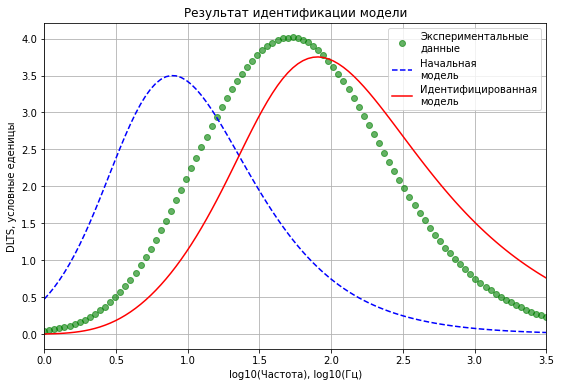

Спектр № 30
amplitude              3.772585
time_constant_power   -2.238109
p_coef                 0.585755
loss                   0.356061
tc_0                   0.031623
tc_1                   0.017783
tc_2                       0.01
tc_3                   0.005623
tc_4                   0.003162
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
amp_3                       1.0
amp_4                       1.0
Name: 30, dtype: object
Значения степеней постоянных времени[-1.5  -1.75 -2.   -2.25 -2.5 ]
Значения амплитуды [1. 1. 1. 1. 1.]


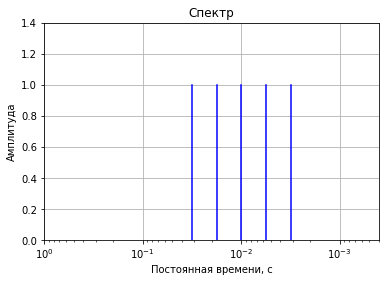

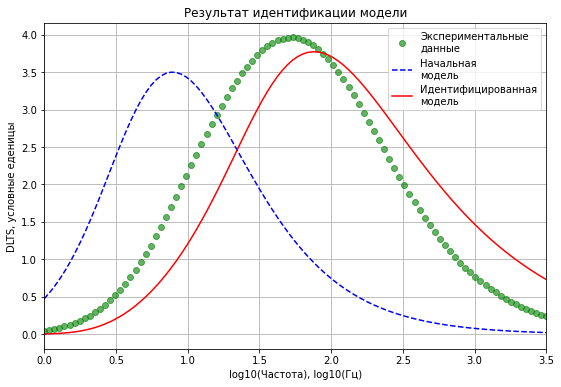

In [8]:
fs = FrequencyScan(time_constant_power=-1.25,)

initial_dlts = fs(frequency_powers)

plot_group_of_models(frequency_powers,
                     time_constant_powers,
                     amplitudes,
                     initial_dlts, 
                     results,
                     save_to = '../plots/3-exp-clear/'
                    )

## Зависимость $p$ от расстояния между линиями на спектре

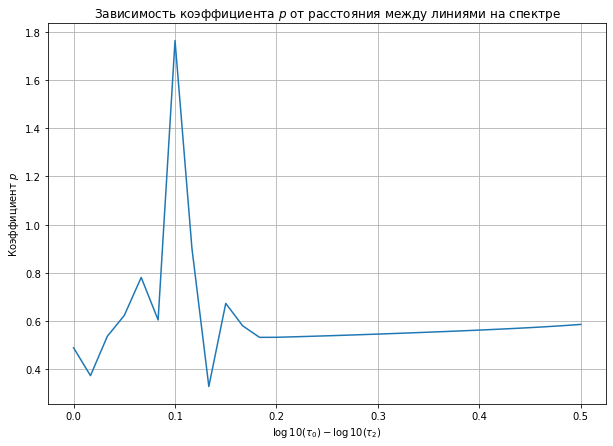

In [9]:
plt.figure(figsize=(10,7))

max_dev = time_constant_powers[:, 0] - time_constant_powers[:, 2]
plt.plot(max_dev, results.p_coef)
plt.title('Зависимость коэффициента $p$ от расстояния между линиями на спектре')
plt.xlabel(r'$\log10(\tau_0) - \log10(\tau_2)$')
plt.ylabel('Коэффициент $p$')
plt.grid()

plt.savefig('../plots/3-exp-clear/plot_p_func.pdf', bbox_inches='tight')
plt.savefig('../plots/3-exp-clear/plot_p_func.jpg', bbox_inches='tight')   

plt.show()

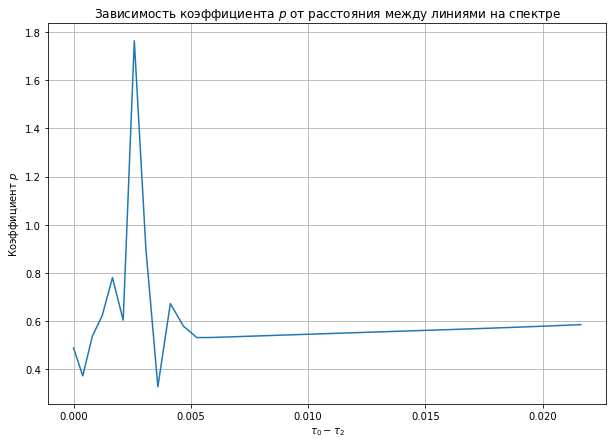

In [10]:
plt.figure(figsize=(10,7))

max_dev = 10 ** time_constant_powers[:, 0] - 10 ** time_constant_powers[:, 2]
plt.plot(max_dev, results.p_coef)
plt.title('Зависимость коэффициента $p$ от расстояния между линиями на спектре')
plt.xlabel(r'$\tau_0 - \tau_2$')
plt.ylabel('Коэффициент $p$')
plt.grid()

plt.savefig('../plots/3-exp-clear/semilogx_p_func.pdf', bbox_inches='tight')
plt.savefig('../plots/3-exp-clear/semilogx_p_func.jpg', bbox_inches='tight')  

plt.show()